In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Udemy/ML/Data Folder/Diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Defination of Features:
1. Pregnancies - Number of Pregnancies
2. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure - Diastolic blood pressure (mm Hg)
4. SkinThickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI - Body mass index (weight in kg / (height in m)^2)
7. DiabetesPedigreeFunction - Diabetes pedigree function
8. Age - Age (years)
9. Outcome - Class variable (1 = True, 0 = False)

Here only outcome is Dependent

Every other feature is Independent

Checking for null values

In [4]:
df.isnull().values.any()

False

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

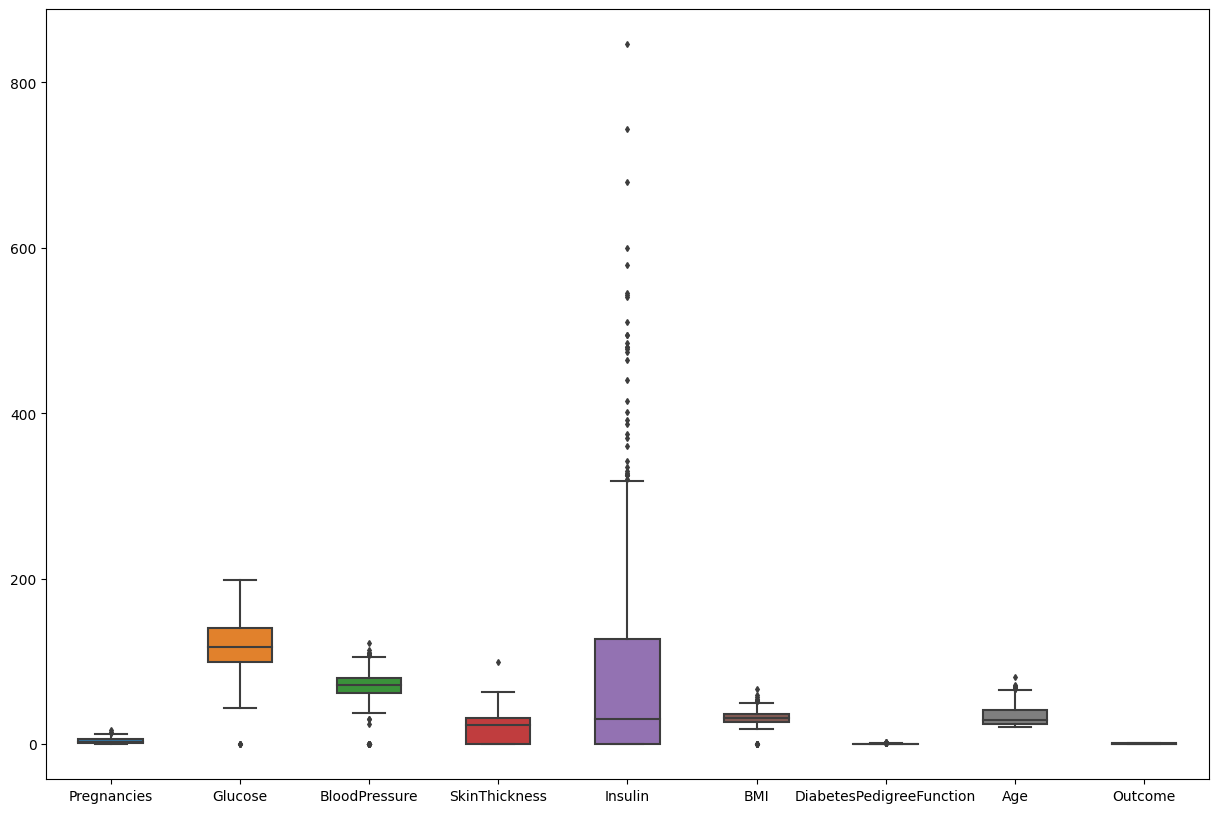

In [6]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

We can se that there are no correlated variables.

<Axes: >

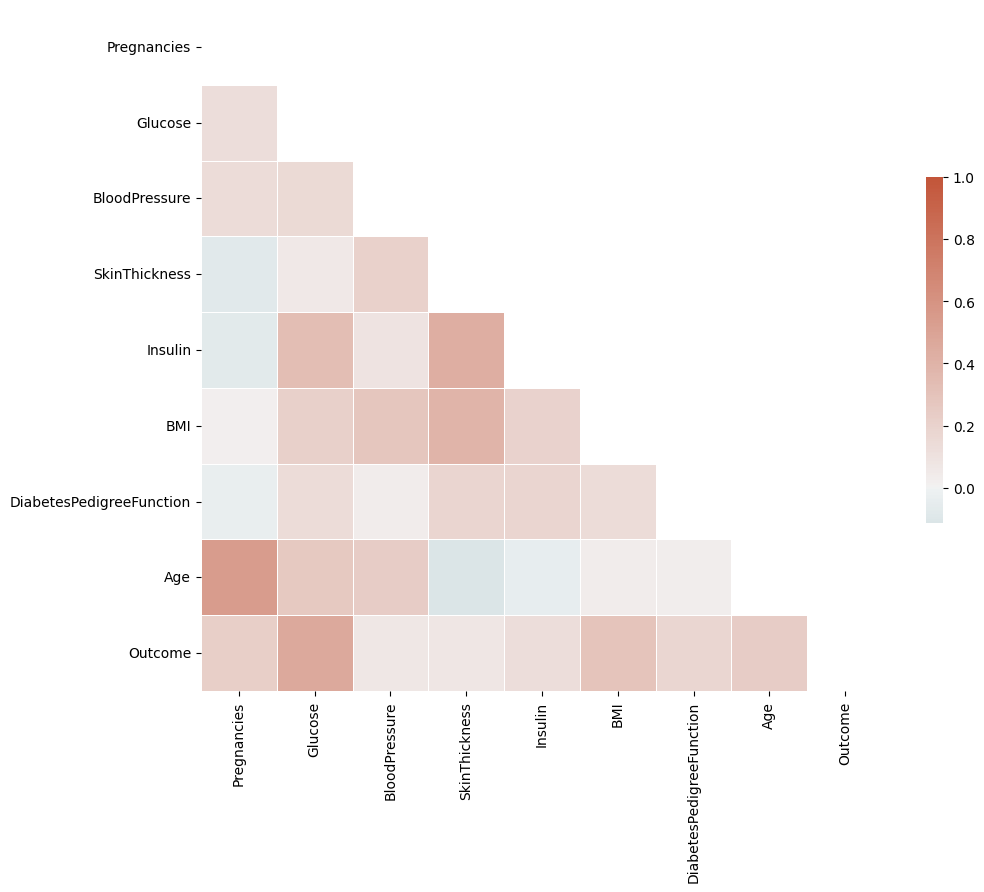

In [7]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) # only the upper triangular part of the matrix is visible
f,ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

<Axes: >

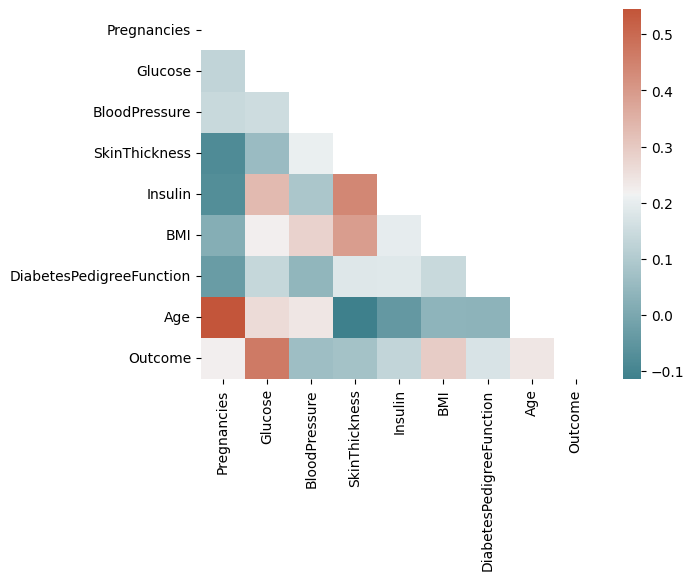

In [8]:
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap)

The correlation looks good there appear to be no correlated columns

Data Types

Inspect data types to see if there are any issues.

The data and its data type(s) look good enough.

In [9]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check Class distribution

In [10]:
num_obs = len(df)
num_true = len(df.loc[df['Outcome']==1])
num_false = len(df.loc[df['Outcome']==0])
print("Number of True Cases: {0} ({1:2.2f} %)". format(num_true, ((1.0*num_true)/(1.0*num_obs))*100))
print("Number of False Cases: {0} ({1:2.2f} %)". format(num_false, ((1.0*num_false)/(1.0*num_obs))*100))

Number of True Cases: 268 (34.90 %)
Number of False Cases: 500 (65.10 %)


A good distribution

Splitting the Dataset

In [11]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

We have to ensure we have desired 70% train and 30% test data

In [13]:
train_val = ((1.0*len(X_train))/(1.0*len(X))*100)
test_val = ((1.0*len(X_test))/(1.0*len(X))*100)
print("{0:0.2f} is training data".format(train_val))
print("{0:0.2f} is test data".format(test_val))

69.92 is training data
30.08 is test data


Check whether the "Outcome" feature was split properly

In [14]:
ori_val1 = len(df.loc[df['Outcome']==1])
ori_val0 = len(df.loc[df['Outcome']==0])
print("Original True : {0} ({1:2.2f}%)".format(ori_val1, ((1.0*ori_val1)/(1.0*len(df)))*100))
print("Original False : {0} ({1:2.2f}%)".format(ori_val0, ((1.0*ori_val0)/(1.0*len(df)))*100))
print("")

trainy_val1 = len(Y_train.loc[Y_train[:]==1])
trainy_val0 = len(Y_train.loc[Y_train[:]==0])
print("Training True : {0} ({1:2.2f}%)".format(trainy_val1, ((1.0*trainy_val1)/(1.0*len(Y_train)))*100))
print("Training False : {0} ({1:2.2f}%)".format(trainy_val0, ((1.0*trainy_val0)/(1.0*len(Y_train)))*100))
print("")

testy_val1 = len(Y_test.loc[Y_test[:]==1])
testy_val0 = len(Y_test.loc[Y_test[:]==0])
print("Testing True : {0} ({1:2.2f}%)".format(testy_val1, ((1.0*testy_val1)/(1.0*len(Y_test)))*100))
print("Testing False : {0} ({1:2.2f}%)".format(testy_val0, ((1.0*testy_val0)/(1.0*len(Y_test)))*100))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Testing True : 80 (34.63%)
Testing False : 151 (65.37%)


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check whether the features contain 0 value if yes then impute it 

In [16]:
print("--> Rows in Data: {0}".format(len(df)))
print("--> Rows Missing (Glucose): {0}".format(len(df.loc[df['Glucose']==0])))
print("--> Rows Missing (BloodPressure): {0}".format(len(df.loc[df['BloodPressure']==0])))
print("--> Rows Missing (SkinThickness): {0}".format(len(df.loc[df['SkinThickness']==0])))
print("--> Rows Missing (Insulin): {0}".format(len(df.loc[df['Insulin']==0])))
print("--> Rows Missing (BMI): {0}".format(len(df.loc[df['BMI']==0])))
print("--> Rows Missing (DiabetesPedigreeFunction): {0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("--> Rows Missing (Age): {0}".format(len(df.loc[df['Age']==0])))


--> Rows in Data: 768
--> Rows Missing (Glucose): 5
--> Rows Missing (BloodPressure): 35
--> Rows Missing (SkinThickness): 227
--> Rows Missing (Insulin): 374
--> Rows Missing (BMI): 11
--> Rows Missing (DiabetesPedigreeFunction): 0
--> Rows Missing (Age): 0


Impute all the 0 values with mean

In [17]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy='mean')

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

Classification model

1. SVM

In [18]:
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

#1 initializing which all attributes should be given to parameters
kernel = ['poly', 'sigmoid','rbf']
C = [100, 50, 10, 1, 0.1, 0.01]
gamma = ['scale']

# create a dictionary where the key value will be the parameter of the Random Forest Classifier
svm_grid = {
    'kernel':kernel,
    'gamma': gamma,
    'C':C
}

svm_model = SVC(probability=True)
svm_grid_search = RandomizedSearchCV(estimator = svm_model, param_distributions = svm_grid, n_iter = 18, verbose = 2, random_state = 42, n_jobs = -1, cv = 30, scoring = 'accuracy', error_score = 0)
svm_grid_search.fit(X_train,Y_train)
best_svm_grid = svm_grid_search.best_estimator_

pred = best_svm_grid.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, pred)
print("Accuracy for training:", accuracy)
print("")

tpred = best_svm_grid.predict(X_test)
taccuracy = metrics.accuracy_score(Y_test, tpred)
print("Accuracy for testing:",taccuracy)
print("")

print("Confusion Matrix: \n")
print(metrics.confusion_matrix(Y_test, tpred, labels=[1, 0]))
print("\n\n")

print("Classification Report: \n")
print(metrics.classification_report(Y_test, tpred, labels=[1, 0]))

Fitting 30 folds for each of 18 candidates, totalling 540 fits
Accuracy for training: 0.7951582867783985

Accuracy for testing: 0.7489177489177489

Confusion Matrix: 

[[ 45  35]
 [ 23 128]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.66      0.56      0.61        80
           0       0.79      0.85      0.82       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



2. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# initializing which all attributes should be given to parameters
n_neighbors = [3,4,5,6,7,8]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

# create a dictionary where the key value will be the parameter of the Random Forest Classifier
knn_grid = {
    'n_neighbors':n_neighbors,
    'algorithm': algorithm,
    'weights':weights
}

knn_model = KNeighborsClassifier()
knn_grid_search = RandomizedSearchCV(estimator = knn_model, param_distributions = knn_grid, n_iter = 18, verbose = 2, random_state = 42, n_jobs = -1, cv = 30, scoring = 'accuracy', error_score = 0)
knn_grid_search.fit(X_train,Y_train)
best_knn_grid = knn_grid_search.best_estimator_

pred = best_knn_grid.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, pred)
print("Accuracy for training:", accuracy)
print("")

tpred = best_knn_grid.predict(X_test)
taccuracy = metrics.accuracy_score(Y_test, tpred)
print("Accuracy for testing:",taccuracy)
print("")

print("Confusion Matrix: \n")
print(metrics.confusion_matrix(Y_test, tpred, labels=[1, 0]))
print("\n\n")

print("Classification Report: \n")
print(metrics.classification_report(Y_test, tpred, labels=[1, 0]))


Fitting 30 folds for each of 18 candidates, totalling 540 fits
Accuracy for training: 0.8081936685288641

Accuracy for testing: 0.696969696969697

Confusion Matrix: 

[[ 42  38]
 [ 32 119]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.57      0.53      0.55        80
           0       0.76      0.79      0.77       151

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231



3. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# initializing which all attributes should be given to parameters
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# create a dictionary where the key value will be the parameter of the Random Forest Classifier
lr_grid = {
    'solver': solvers,
    'penalty': penalty,
    'C': c_values
}

lr_model = LogisticRegression(max_iter=500)
lr_grid_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_grid, n_iter=10, verbose=2, random_state=42, n_jobs=-1, cv=30, scoring='accuracy', error_score=0)
lr_grid_search.fit(X_train, Y_train)

best_lr_grid = lr_grid_search.best_estimator_

pred = best_lr_grid.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, pred)
print("Accuracy for training:", accuracy)
print("")

tpred = best_lr_grid.predict(X_test)
taccuracy = metrics.accuracy_score(Y_test, tpred)
print("Accuracy for testing:",taccuracy)
print("")

print("Confusion Matrix: \n")
print(metrics.confusion_matrix(Y_test, tpred, labels=[1, 0]))
print("\n\n")

print("Classification Report: \n")
print(metrics.classification_report(Y_test, tpred, labels=[1, 0]))


Fitting 30 folds for each of 10 candidates, totalling 300 fits
Accuracy for training: 0.7895716945996276

Accuracy for testing: 0.7359307359307359

Confusion Matrix: 

[[ 47  33]
 [ 28 123]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



4. Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_model = GaussianNB(priors=[0.865,0.135], var_smoothing=1e-10)
nb_model.fit(X_train,Y_train)

nb_predict_train = nb_model.predict(X_train)
nb_accuracy = metrics.accuracy_score(Y_train, nb_predict_train)
print ("- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Training Data) is : {0:.5f}".format(nb_accuracy))
nb_predict_test = nb_model.predict(X_test)
nb_accuracy_testdata = metrics.accuracy_score(Y_test, nb_predict_test)
print ("- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Testing Data) is : {0:.5f}".format(nb_accuracy_testdata))
print("")

print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(Y_test, nb_predict_test, labels = [1, 0])) 
print ("\n\n")
print ("Classification Report: \n")
print (metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))

- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Training Data) is : 0.76164
- Accuracy of 'Gaussian NB', for Diabetes Prediction (On Testing Data) is : 0.75758

Confusion Matrix: 

[[ 41  39]
 [ 17 134]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.71      0.51      0.59        80
           0       0.77      0.89      0.83       151

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



5. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#1 initializing which all attributes should be given to parameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

# create a dictionary where the key value will be the parameter of the Random Forest Classifier
random_grid = {
    'n_estimators' : n_estimators,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

rf = RandomForestClassifier()
rf_grid_search = RandomizedSearchCV(estimator=rf, param_distributions= random_grid, n_iter=100, cv=3, verbose = 2, random_state= 100, n_jobs= -1)
rf_grid_search.fit(X_train,Y_train)
best_random_grid = rf_grid_search.best_estimator_

pred = best_random_grid.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, pred)
print("Accuracy for training:",accuracy)
print("")

tpred = best_random_grid.predict(X_test)
taccuracy = metrics.accuracy_score(Y_test, tpred)
print("Accuracy for testing:",taccuracy)
print("")

print ("Confusion Matrix: \n")
print (metrics.confusion_matrix(Y_test, tpred, labels = [1, 0])) 
print ("\n\n")

print ("Classification Report: \n")
print (metrics.classification_report(Y_test, tpred, labels = [1, 0]))



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy for training: 0.8845437616387337

Accuracy for testing: 0.7619047619047619

Confusion Matrix: 

[[ 53  27]
 [ 28 123]]



Classification Report: 

              precision    recall  f1-score   support

           1       0.65      0.66      0.66        80
           0       0.82      0.81      0.82       151

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [35]:
rf_grid_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'log_loss'}

In [36]:
rf_grid_search.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=10, max_features='log2',
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=400)

Comparing all the 3 models

Text(0.5, 0, 'False Positive Rate')

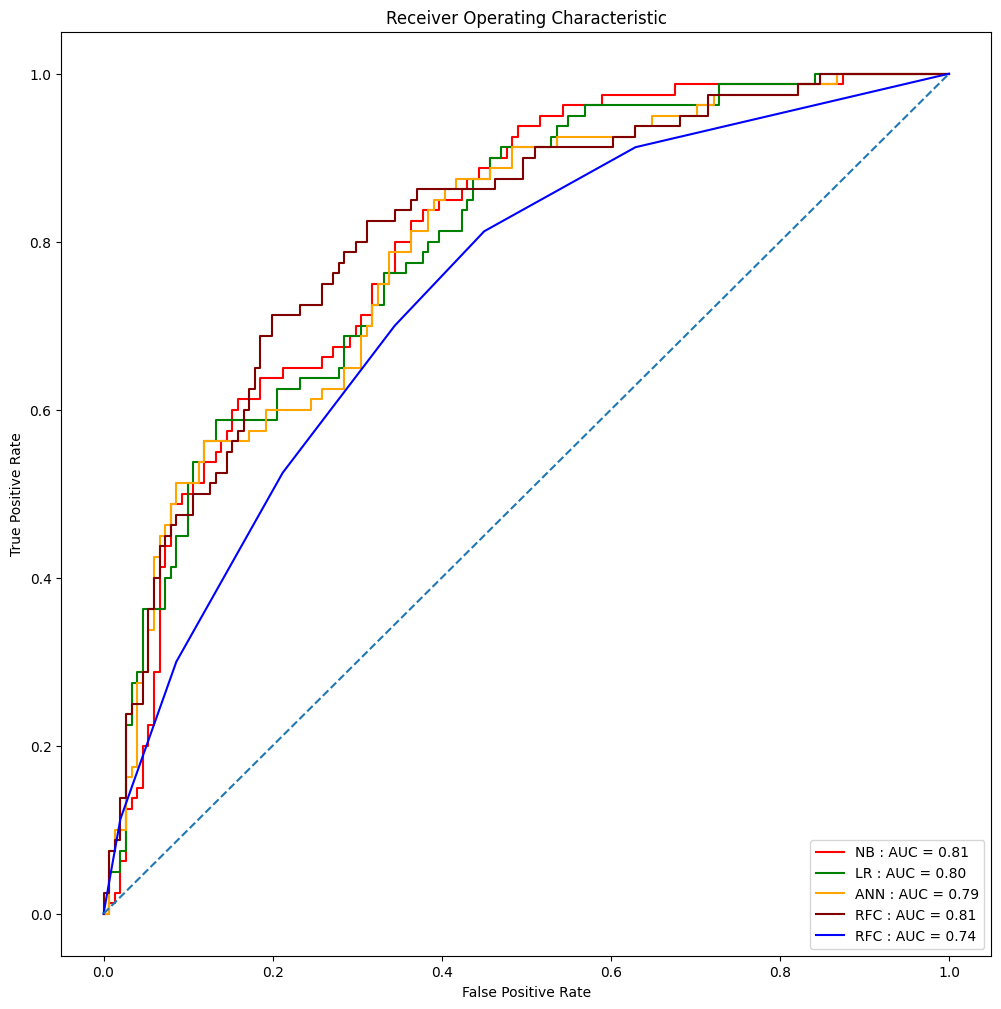

In [39]:
from sklearn.metrics import roc_curve, auc
y_prob = nb_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
nb_model.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(12, 12))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'NB : AUC = %0.2f' % roc_auc)

y_prob = lr_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'LR : AUC = %0.2f' % roc_auc)


y_prob = svm_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
svm_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='orange' ,label = 'ANN : AUC = %0.2f' % roc_auc)

y_prob = rf_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rf_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='maroon' ,label = 'RFC : AUC = %0.2f' % roc_auc)

y_prob = knn_grid_search.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
knn_grid_search.score(X_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='blue' ,label = 'RFC : AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

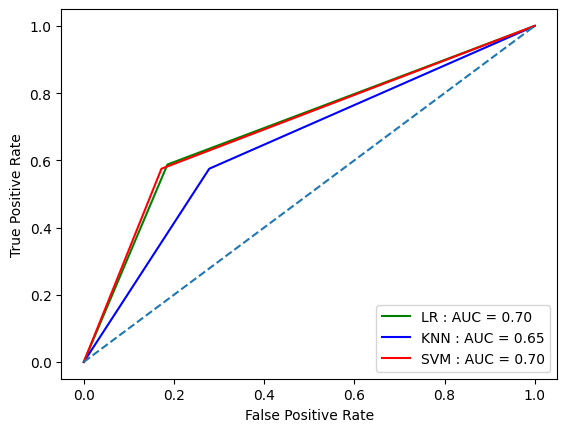

In [ ]:
# from sklearn.metrics import roc_curve, auc

# y_prob = ypredlogistic
# y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# accuracy_score(Y_test, y_pred)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'LR : AUC = %0.2f' % roc_auc)

# y_prob = ypredknn
# y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# accuracy_score(Y_test, y_pred)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# plt.plot(false_positive_rate,true_positive_rate, color='blue' ,label = 'KNN : AUC = %0.2f' % roc_auc)

# y_prob = ypred
# y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# accuracy_score(Y_test, y_pred)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'SVM : AUC = %0.2f' % roc_auc)

# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],linestyle='--')
# plt.axis('tight')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')

Parallel processing

In [ ]:
from time import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

For 1 core

In [ ]:
# CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
#Define the evaluation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
start_time = time()
n_scores = cross_val_score(model, X_train,Y_train, scoring='accuracy',cv=cv, n_jobs=1)
end_time = time()
print(end_time-start_time)

2.0224976539611816


For 2 core

In [ ]:
# CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
#Define the evaluation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
start_time = time()
n_scores = cross_val_score(model, X_train,Y_train, scoring='accuracy',cv=cv,n_jobs=2)
end_time = time()
print(end_time-start_time)

1.1338918209075928


For all the cores

In [ ]:
# CPU cores we use n_jobs
model = RandomForestClassifier(n_estimators=100)
#Define the evaluation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
start_time = time()
n_scores = cross_val_score(model, X_train,Y_train, scoring='accuracy',cv=cv,n_jobs=-1)
end_time = time()
print(end_time-start_time)

0.47173380851745605
